<a href="https://colab.research.google.com/github/seijimorimoto/CE888-Data-Science/blob/master/Lab4/CE888_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.ensemble import ExtraTreesClassifier
import itertools

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4/bank-additional-full.csv', sep=";")

In [0]:
df_dummies = pd.get_dummies(df)

In [0]:
del df_dummies["y_no"]
del df_dummies["duration"]

Text(0.5, 1.0, 'Histogram of y_yes')

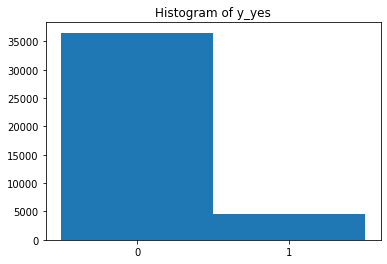

In [5]:
plt.hist(df_dummies['y_yes'], bins=[0, 0.5, 1])
plt.xticks(ticks=[0.25, 0.75], labels=[0, 1])
plt.title('Histogram of y_yes')

In [0]:
y = df_dummies['y_yes']
X = df_dummies.drop(columns=['y_yes'])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [8]:
clf = ExtraTreesClassifier(n_estimators=100, max_depth=4)
scores = cross_validate(clf, X_train, y_train, scoring='accuracy', cv=10)
print(scores['test_score'])

[0.89711684 0.8983308  0.89468892 0.90197269 0.90136571 0.90136571
 0.89954476 0.89802731 0.89863429 0.89954476]


In [0]:
corr_mat = df_dummies.corr()

In [0]:
feature_corr = corr_mat[:]['y_yes']
del feature_corr['y_yes']

In [0]:
abs_feature_corr = feature_corr.abs()

In [0]:
sorted_features = abs_feature_corr.sort_values(ascending=False)

In [0]:
sorted_values = []
sorted_columns = []
for column, value in sorted_features.items():
  sorted_columns.append(column)
  sorted_values.append(value)

(0, 0.372412210717462)

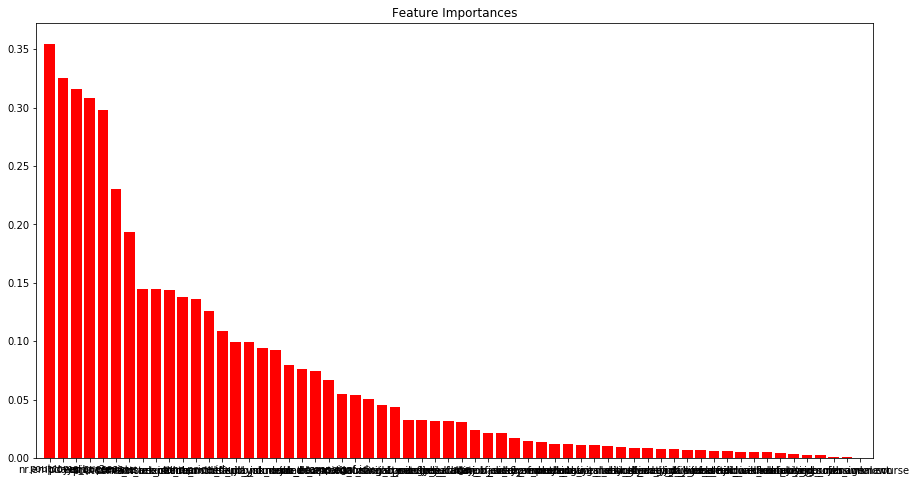

In [14]:
fig = plt.figure()
plt.title('Feature Importances')
plt.bar(range(len(sorted_columns)), sorted_values, color='r', align='center')
plt.xticks(range(len(sorted_columns)), sorted_columns)
plt.xlim([-1, len(sorted_columns)])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        t = "(%.2f)"%(cm[i, j])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix


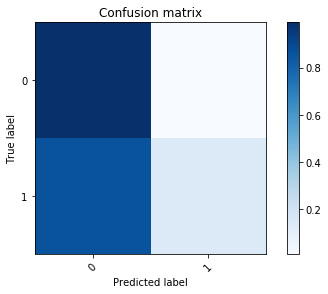

In [16]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=range(len(set(y_test))), normalize = True,
                      title='Confusion matrix')